## Vanessa Williams
## Week 10

#### A CVS file was used to complete this assignment

In [5]:
pip install stock-analyser

In [2]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install yfinance

In [11]:
!pip install yfinance statsmodels

In [1]:
%matplotlib inline
import itertools
import pandas as pd
import stock_analysis
from stock_analysis.utils import group_stocks

In [2]:
import numpy as np

### Question 1

Text(0, 0.5, 'price ($)')

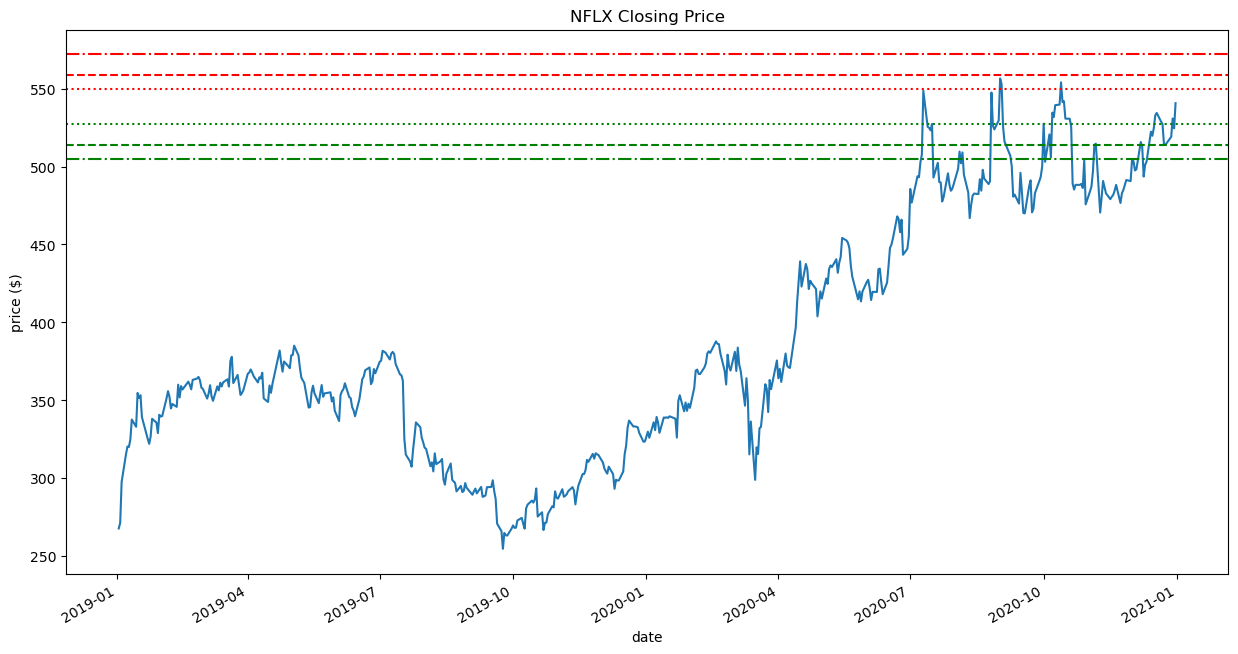

In [3]:
# Define start and end dates
start, end = '2019-01-01', '2020-12-31'

# Read the CSV file with date filtering
nflx = pd.read_csv("netflix.csv", parse_dates=['date'])
nflx = nflx[(nflx['date'] >= start) & (nflx['date'] <= end)]

# Set 'date' as the index
nflx.set_index('date', inplace=True)

def levels(analyzer, method):
    return [getattr(analyzer, method)(i) for i in range(1, 4)]

# calculate support/resistance levels
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)
support_levels, resistance_levels = (
    levels(nflx_analyzer, metric) for metric in ['support', 'resistance']
)

nflx_viz = stock_analysis.StockVisualizer(nflx)
ax = nflx_viz.evolution_over_time('close', figsize=(15, 8), title='NFLX Closing Price')

for support, resistance, linestyle, level in zip(
    support_levels, resistance_levels, 
    [':', '--', '-.'], itertools.count(1)
):
    nflx_viz.add_reference_line(
        ax, 
        y=support, 
        label=f'support level {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflx_viz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'resistance level {level}', 
        color='red', 
        linestyle=linestyle
    )
ax.get_legend().remove()
ax.set_ylabel('price ($)')

### Question 2A

#### Data prep

In [4]:
# Load the Facebook stock data from 'facebook.csv' and parse the 'date' column as datetime format
fb = pd.read_csv("facebook.csv", parse_dates=['date'])

# Filter the Facebook data to include only rows where the 'date' falls within the specified start and end range
fb = fb[(fb['date'] >= start) & (fb['date'] <= end)]

# Set 'date' column as the index for the Facebook DataFrame, allowing easier access to rows by date
fb.set_index('date', inplace=True)


# Load the Apple stock data from 'apple.csv' and parse the 'date' column as datetime format
aapl = pd.read_csv("apple.csv", parse_dates=['date'])

# Filter the Apple data to include only rows where the 'date' falls within the specified start and end range
aapl = aapl[(aapl['date'] >= start) & (aapl['date'] <= end)]

# Set 'date' column as the index for the Apple DataFrame, allowing easier access to rows by date
aapl.set_index('date', inplace=True)

# Load the Amazon stock data from 'amazon.csv' and parse the 'date' column as datetime format
amzn = pd.read_csv("amazon.csv", parse_dates=['date'])

# Filter the Amazon data to include only rows where the 'date' falls within the specified start and end range
amzn = amzn[(amzn['date'] >= start) & (amzn['date'] <= end)]

# Set 'date' column as the index for the Amazon DataFrame, allowing easier access to rows by date
amzn.set_index('date', inplace=True)

# Load the Google stock data from 'google.csv' and parse the 'date' column as datetime format
goog = pd.read_csv("google.csv", parse_dates=['date'])

# Filter the Google data to include only rows where the 'date' falls within the specified start and end range
goog = goog[(goog['date'] >= start) & (goog['date'] <= end)]

# Set 'date' column as the index for the Google DataFrame, allowing easier access to rows by date
goog.set_index('date', inplace=True)

In [5]:
faang = {
    'fb': fb,
    'aapl': aapl,
    'amzn': amzn,
    'nflx': nflx,
    'goog': goog
}
combined_df = pd.concat(faang, axis=0, keys=faang.keys())
combined_df = combined_df.reset_index(level=0).rename(columns={'level_0': 'name'})

array([[<AxesSubplot:title={'center':"aapl Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'aapl after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"amzn Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'amzn after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"fb Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'fb after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"goog Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'goog after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"nflx Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
   

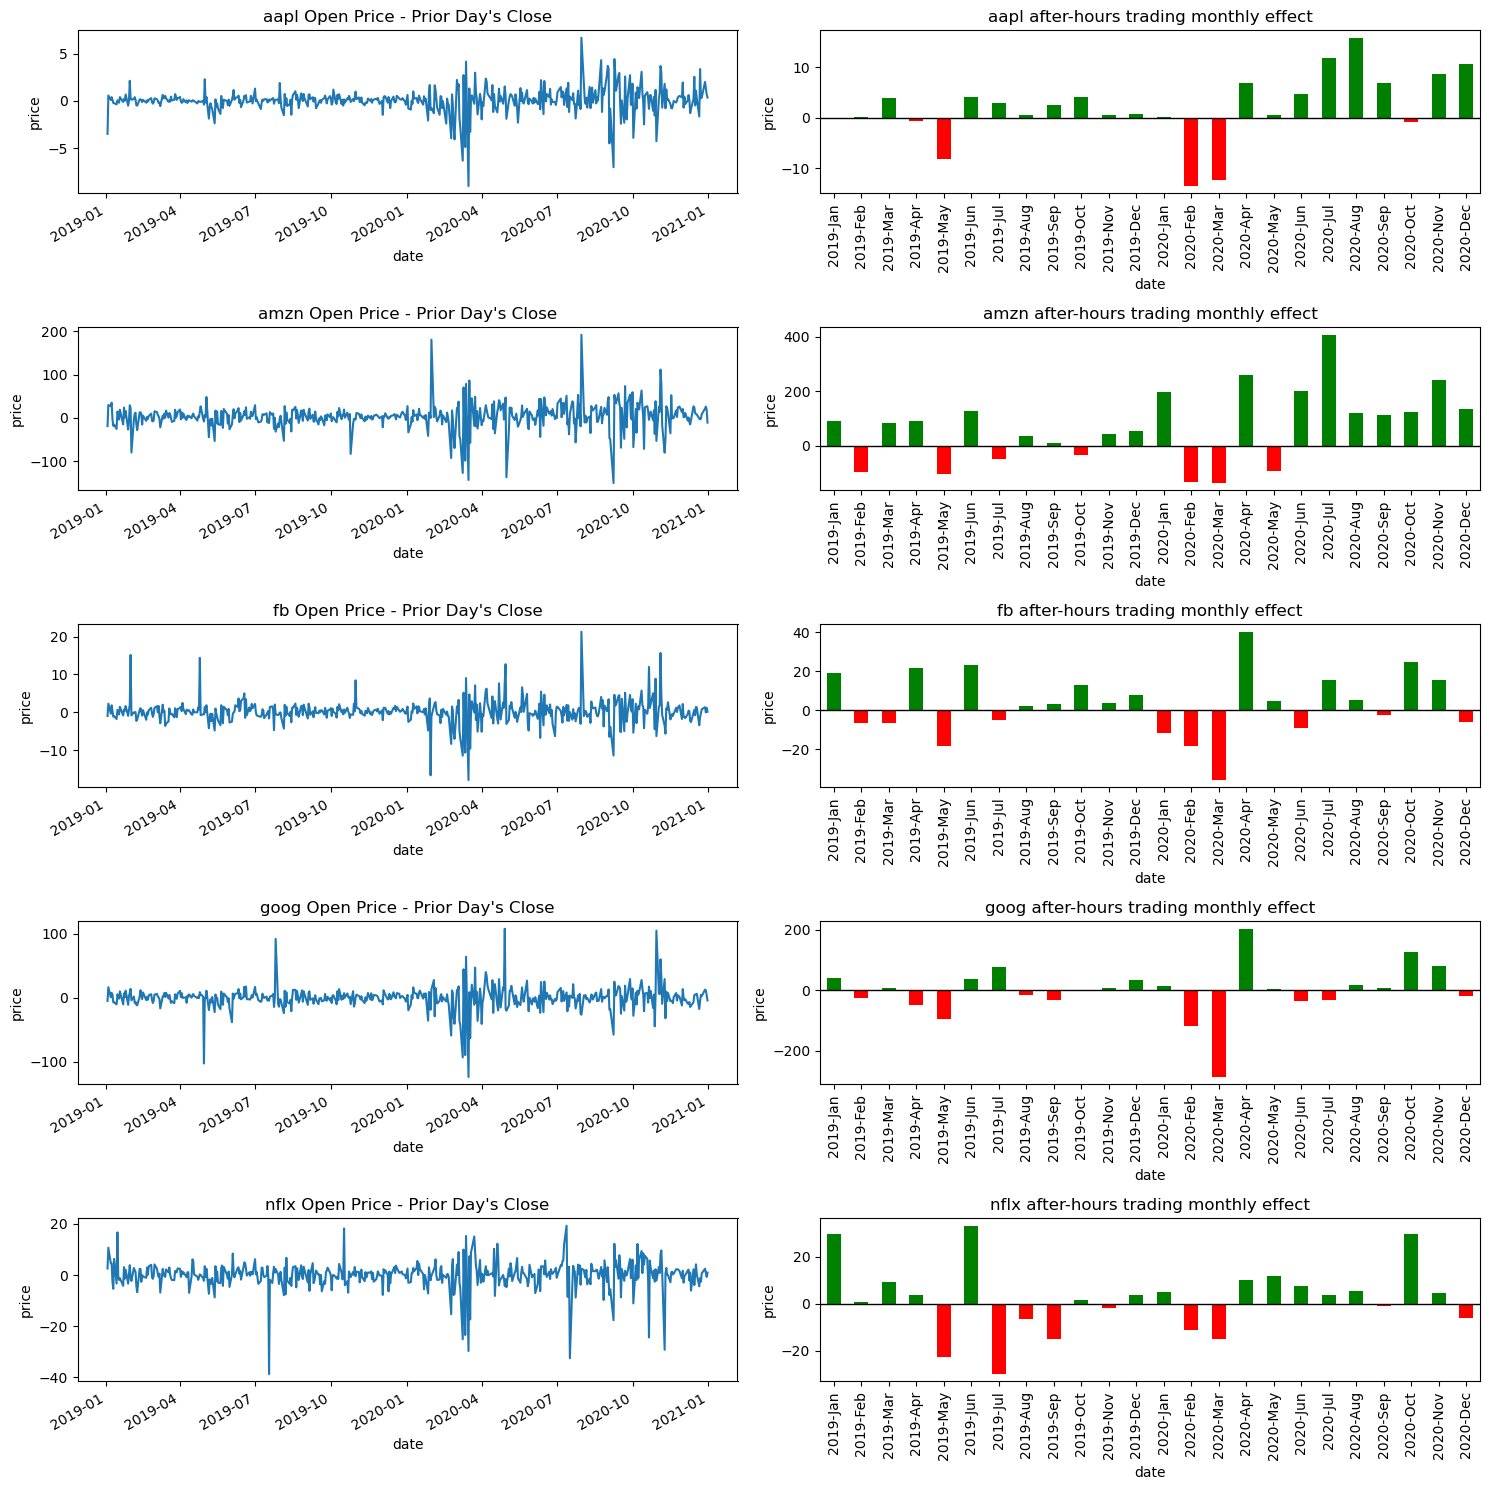

In [6]:
stock_analysis.AssetGroupVisualizer(combined_df).after_hours_trades()

### Question 2B

array([<AxesSubplot:title={'center':"After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot:title={'center':'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

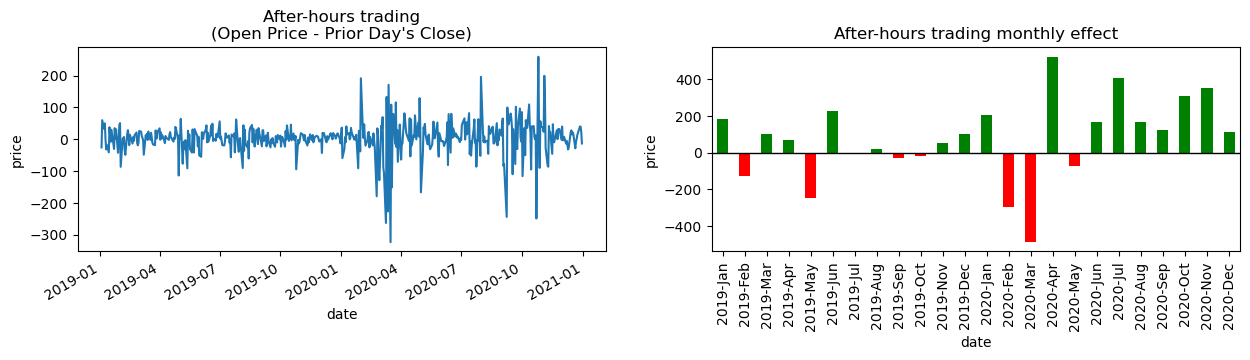

In [7]:
# Import the `make_portfolio` function from the `stock_analysis.utils` module
from stock_analysis.utils import make_portfolio

# Create a StockVisualizer object with after-hours trading data:
# - `make_portfolio(combined_df)`: Combines multiple stock data into a single portfolio
# - `StockVisualizer`: A visualization class to analyze stock data, likely to create visual insights on a portfolio
# - `after_hours_trades()`: A method to visualize or analyze after-hours trading activity for the portfolio
stock_analysis.StockVisualizer(make_portfolio(combined_df)).after_hours_trades()

### Question 3A

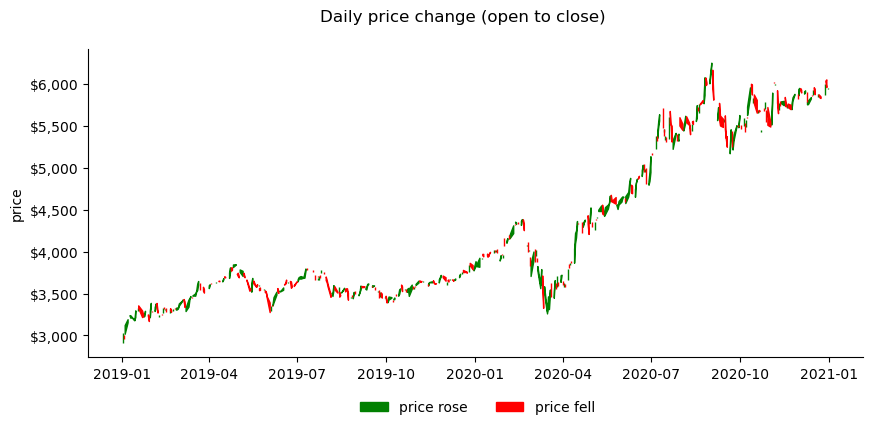

In [8]:
# Import StrMethodFormatter from matplotlib.ticker to format the y-axis labels with dollar signs and commas
from matplotlib.ticker import StrMethodFormatter

# Import make_portfolio from stock_analysis.utils, likely used to create a combined portfolio from multiple stocks
from stock_analysis.utils import make_portfolio

# Create a StockVisualizer object to visualize open-to-close price data for the portfolio:
# - make_portfolio(combined_df): Combines multiple stock dataframes into a single portfolio
# - StockVisualizer(...).open_to_close(): Generates an open-to-close price plot for the portfolio
ax = stock_analysis.StockVisualizer(make_portfolio(combined_df)).open_to_close()

# Format the y-axis to display values as dollar amounts, with commas for thousands and no decimal places
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

### Question 3B

In [9]:
# Load the Bitcoin data from 'bitcoin.csv', parsing the 'date' column as datetime format
bitcoin = pd.read_csv("bitcoin.csv", parse_dates=['date'])

# Filter the Bitcoin data to include only rows where the 'date' is within the specified start and end range
bitcoin = bitcoin[(bitcoin['date'] >= start) & (bitcoin['date'] <= end)]

# Set 'date' column as the index for the Bitcoin DataFrame, making it the primary way to access rows by date
bitcoin.set_index('date', inplace=True)

# Load the S&P 500 data from 'sp500.csv', parsing the 'date' column as datetime format
sp = pd.read_csv("sp500.csv", parse_dates=['date'])

# Filter the S&P 500 data to include only rows where the 'date' is within the specified start and end range
sp = sp[(sp['date'] >= start) & (sp['date'] <= end)]

# Set 'date' column as the index for the S&P 500 DataFrame, making it the primary way to access rows by date
sp.set_index('date', inplace=True)

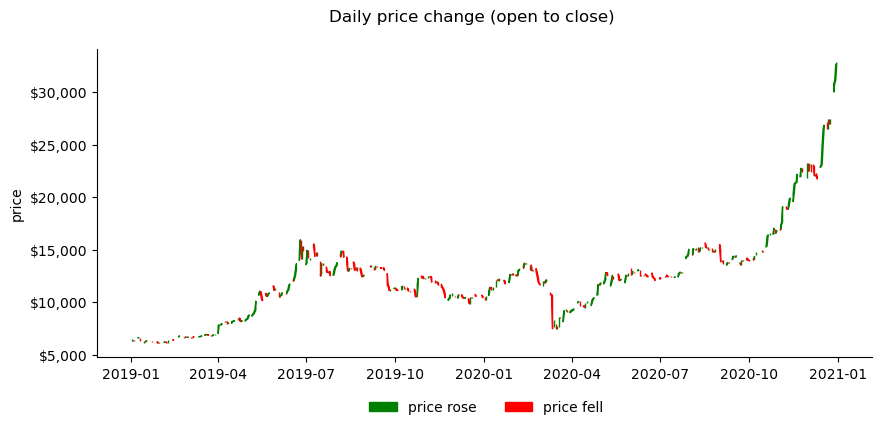

In [11]:

# Visualize the open-to-close price data for Bitcoin and reindexed S&P 500 combined portfolio
ax = stock_analysis.StockVisualizer(bitcoin + sp).open_to_close()

# Format the y-axis labels as dollar amounts with commas and no decimal places
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


### Question 4

In [12]:
# Create an AssetGroupAnalyzer object to analyze the combined asset data (Bitcoin and S&P 500).
# - combined_df: DataFrame containing the combined data of multiple assets
# - analyze('annualized_volatility'): Analyzes the annualized volatility of the assets in the DataFrame,
#   which measures the risk by calculating the standard deviation of returns on an annual basis.
stock_analysis.AssetGroupAnalyzer(combined_df).analyze('annualized_volatility')

{'aapl': 0.4670809643500883,
 'amzn': 0.38510990770417824,
 'fb': 0.458482601912601,
 'goog': 0.3833720603377728,
 'nflx': 0.46267720908872983}

### Question 5

In [13]:
# Initialize a StockReader object to retrieve stock data and metrics within the specified date range.
# - start, end: Start and end dates for the data being read.
reader = stock_analysis.StockReader(start, end)

# Define a function to create a table of financial metrics for a given stock.
def metric_table(stock, index, r_f):
    """
    Create a table of metrics for a stock.

    Parameters:
        - stock: The stock's DataFrame, containing the stock's historical data.
        - index: The DataFrame for the benchmark index, used as a reference to calculate certain metrics.
        - r_f: The risk-free rate of return, which is used in metrics like alpha and Sharpe ratio.
     
    Returns:
        A `pandas.DataFrame` object with a single row containing key financial metrics for the stock.
    """
    
    # Return a DataFrame with each metric as a column and calculated using StockAnalyzer methods.
    return pd.DataFrame({
        # For each metric in the dictionary, retrieve and calculate it using StockAnalyzer
        metric: getattr(
            stock_analysis.StockAnalyzer(stock), 
            metric
        )(**kwargs) \
        for metric, kwargs in {
            # Each key-value pair defines the metric and its required arguments
            'alpha': {'index': index, 'r_f': r_f}, 
            'beta': {'index': index}, 
            'sharpe_ratio': {'r_f': r_f},
            'annualized_volatility': {},
            'is_bear_market': {},
            'is_bull_market': {}
        }.items()
    }, index=range(1))  # Set index=range(1) to create a single-row DataFrame

# Test the function by calculating metrics for Netflix (nflx) using Bitcoin as the benchmark and a risk-free rate
metric_table(nflx, bitcoin, r_f=reader.get_risk_free_rate_of_return())


[*********************100%***********************]  1 of 1 completed


,alpha,beta,sharpe_ratio,annualized_volatility,is_bear_market,is_bull_market
0,NaN,0.092598,NaN,0.462677,False,False
